In [256]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn= warn

import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA,KernelPCA
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from datetime import datetime, timedelta
import numpy as np
from scipy.optimize import *
import sympy as sp
from sympy import *
import scipy.integrate as spi
from scipy import *
warnings.filterwarnings('ignore')

sns.set_context('notebook')
sns.set_style('white')

In [238]:
Filepath= r"Dataset.csv"
df=pd.read_csv(Filepath)
print(df.head())

                      Time  Latitude  Longitude  Depth/Km  Magnitude
0  2016-08-24 03:36:32.000   42.6983    13.2335       8.1        6.0
1  2016-08-24 03:37:26.580   42.7123    13.2533       9.0        4.5
2  2016-08-24 03:40:46.590   42.7647    13.1723       9.7        3.8
3  2016-08-24 03:41:38.900   42.7803    13.1683       9.7        3.9
4  2016-08-24 03:42:07.170   42.7798    13.1575       9.7        3.6


In [239]:
df['Time']=pd.to_datetime(df['Time'])

In [240]:
dfD=df[df['Magnitude'] > 3.0 ]
dfD.reset_index(drop=True, inplace=True)

In [241]:
dfD
window_size = '1W'
groupedD = dfD.groupby(pd.Grouper(key='Time', freq=window_size))

In [242]:
Wind0='2016-08-28 00:00:00'
Wind1='2016-09-04 00:00:00'
Wind2='2016-09-11 00:00:00'
Wind3='2016-09-18 00:00:00'
Wind4='2016-09-25 00:00:00'
Wind5='2016-10-02 00:00:00'
Wind6='2016-10-09 00:00:00'
Wind7='2016-10-16 00:00:00'
Wind8='2016-10-23 00:00:00'
Wind9='2016-10-30 00:00:00'
Wind10='2016-11-06 00:00:00'
Wind11='2016-11-13 00:00:00'
Wind12='2016-11-20 00:00:00'
Wind13='2016-11-27 00:00:00'
Wind14='2016-12-04 00:00:00'

In [243]:
Ventana1= groupedD.get_group(Wind0).to_numpy()
Ventana2= groupedD.get_group(Wind1).to_numpy()
Ventana3= groupedD.get_group(Wind2).to_numpy()
Ventana4= groupedD.get_group(Wind3).to_numpy()
Ventana5= groupedD.get_group(Wind4).to_numpy()
Ventana6= groupedD.get_group(Wind5).to_numpy()
Ventana7= groupedD.get_group(Wind6).to_numpy()
Ventana8= groupedD.get_group(Wind7).to_numpy()
#Ventana9= groupedD.get_group(Wind8)
Ventana10= groupedD.get_group(Wind9).to_numpy()
Ventana11= groupedD.get_group(Wind10).to_numpy()
Ventana12= groupedD.get_group(Wind11).to_numpy()
Ventana13= groupedD.get_group(Wind12).to_numpy()
Ventana14= groupedD.get_group(Wind13).to_numpy()
Ventana15= groupedD.get_group(Wind14).to_numpy()

In [244]:
Columnas=['Time','Latitude','Longitude','Depth','Magnitude']
dfV1=pd.DataFrame(Ventana1, columns=Columnas)
dfV2=pd.DataFrame(Ventana2, columns=Columnas)
dfV3=pd.DataFrame(Ventana3, columns=Columnas)
dfV4=pd.DataFrame(Ventana4, columns=Columnas)
dfV5=pd.DataFrame(Ventana5, columns=Columnas)
dfV6=pd.DataFrame(Ventana6, columns=Columnas)
dfV7=pd.DataFrame(Ventana7, columns=Columnas)
dfV8=pd.DataFrame(Ventana8, columns=Columnas)
dfV10=pd.DataFrame(Ventana10, columns=Columnas)
dfV11=pd.DataFrame(Ventana11, columns=Columnas)
dfV12=pd.DataFrame(Ventana12, columns=Columnas)
dfV13=pd.DataFrame(Ventana13, columns=Columnas)
dfV14=pd.DataFrame(Ventana14, columns=Columnas)
dfV15=pd.DataFrame(Ventana15, columns=Columnas)

In [353]:
def VECTS(df):
    #X = df['Latitude'].values.astype(float)
    #Y = df['Longitude'].values.astype(float)
    DT=df['Time'].iloc[len(df)-1]-df['Time'].iloc[0]
    DTD= DT.total_seconds() / (60*60*24)
    T=np.linspace(1, int(DTD) ,num=len(df))
    xi = dfV1['Latitude'].min()
    xf = dfV1['Latitude'].max()
    yi = dfV1['Longitude'].min()
    yf = dfV1['Longitude'].max()
    ti = min(T)
    tf = max(T)
    Mc=3.0
    Mm=max(df['Magnitude'])
    mp=Mm-Mc
    X = np.zeros(len(df))
    Y = np.zeros(len(df))
    M = np.zeros(len(df))
    L = np.zeros(len(df))
    for i in df.index:
        M[i]=df['Magnitude'].iloc[i]-Mc
        X[i]=df['Latitude'].iloc[len(df)-1]-df['Latitude'].iloc[i]
        Y[i]=df['Longitude'].iloc[len(df)-1]-df['Longitude'].iloc[i]
        L[i]=(np.power(X[i],2)+np.power(Y[i],2))
    DTD= DT.total_seconds() / (60*60*24)
    T=np.linspace(1, int(DTD) ,num=len(df))
    return X,Y,L,M,T,xi,xf,yi,yf,ti,tf,mp

def EQETAS(X,Y,L,M,T):
    XO=sp.sympify(X)
    YO=sp.sympify(Y)
    LO=sp.sympify(L)
    MO=sp.sympify(M)
    TO=sp.sympify(T)
    FA=[]
    N=X.size
    x,y,k,p,c,t,a,m,d,q,u = symbols ('x, y, k, p, c, t, a, m, d, q, u')
    f1=u+k*(sp.Pow((t)+c,-p))*sp.Pow(( (x**2 + y**2) / exp(m*a) )+ d ,-q)
    for i in range(N):
        A=sp.simplify(f1.subs(x,XO[i]).subs(y,YO[i]).subs(t,TO[i]).subs(m,MO[i])).evalf()
        Leq=sp.log(A)
        FA.append(Leq)
    Eq=sum(FA)
    return Eq

def IEQ(xi,xf,yi,yf,ti,tf,mp):
    u1=0.000335
    k1=0.00016700000000000002
    c1=0.0051400000000000005
    a1=0.961
    d1=0.00034100000000000005
    q1=1.405
    p1=0.961
    x,y,k,p,c,t,a,m,d,q,u = symbols('x, y, k, p, c, t, a, m, d, q, u')
    f1=u+k*(sp.Pow((t)+c,-p))*sp.Pow(( (x**2 + y**2) / exp(m*a) )+ d ,-q)
    #f2= sp.integrate(f1,(x,xi,xf),(y,yi,yf),(t,ti,tf)).doit()
    f2=f1.subs(u,u1).subs(k,k1).subs(c,c1).subs(a,a1).subs(d,d1).subs(q,q1).subs(p,p1).subs(m,mp)
    f2_np = lambdify((x, y, t), f2, modules=['scipy'])
    resultado, error=spi.nquad(f2_np, [(xi, xf), (yi, yf), (ti, tf)])
    #resultado=
    #P=integrate(f2,(x,xi,xf),(y,yi,yf),(t,ti,tf)).doit()
    return resultado

def ETSA(X,Y,L,M,T,P,r):
    k,p,c,a,d,q,u = symbols ('k, p, c, a, d, q, u')
    k1=P[0]
    p1=P[1]
    c1=P[2]
    a1=P[3]
    d1=P[4]
    q1=P[5]
    u1=P[6]
    H=EQETAS(X,Y,L,M,T)
    LH=(-1)*(H-r)
    LLH=lambdify((k,p,c,a,d,q,u), LH, modules=['scipy'])
    return LLH(k1,p1,c1,a1,d1,q1,u1)

In [440]:
X,Y,L,M,T,xi,xf,yi,yf,ti,tf,mp=VECTS(dfV15)
P=[1,1,1,1,1,1,1]

In [441]:
F=EQETAS(X,Y,L,M,T)


In [442]:
Al=IEQ(xi,xf,yi,yf,ti,tf,mp)
#parametros de U  u, c,

In [443]:
def constraint1(P):
    return P[1]

def constraint2(P):
    return P[2]

In [444]:
#ALN=lambdify((x,y,t),Al,'numpy')
#minimize(ETSA, P, args=(X,Y,L,M,T,Al))
cons = (({'type':'ineq','fun': constraint1},
         {'type':'ineq','fun': constraint2}))
ar1=minimize(ETSA, P, args=(X,Y,L,M,T,Al),constraints=cons)

In [445]:
ar1

     fun: -4.559046073957611
     jac: array([-8.57114792e-05,  0.00000000e+00,  9.18507576e-05,  3.33786011e-05,
       -2.38478184e-04, -3.30984592e-04, -1.06811523e-04])
 message: 'Optimization terminated successfully'
    nfev: 80
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([-1.72943506e-04, -2.60457678e-19,  3.02624773e-04,  1.10131247e-04,
       -7.06873160e-04, -1.04537773e-03, -2.78477279e-04])

In [263]:
#TAV=sp.Integral(TA,(y,yi,yf)).doit()

In [264]:
#TAV

In [466]:
ps1=np.array([ 1.06416629e-04,  7.23532699e-04,  0.00000000e+00,  2.59892357e-05,
        1.65348183e-04,  5.83631350e-05, -5.39498838e-06 ])
ps2=np.array([-1.00907376e-03,  0.00000000e+00,  1.11955276e-03, -6.63710130e-04,
       -1.01714512e-03, -2.95314817e-05, -1.40376072e-04])
ps3=np.array([ 0.00259824,  0.00016385,  0.00264929,  0.0103257 ,  0.00790012,
        0.00178515, -0.00240945])
ps4=np.array([ 7.91678925e-03, -2.24937667e-18,  0.00000000e+00,  4.85304241e-03,
        4.94658951e-03,  1.58154033e-02,  1.56100118e-02])
ps5=np.array([ 1.78380057e-03, -4.33680869e-19, -9.10144050e-20, -2.33696787e-04,
       -1.02658971e-03, -1.33237411e-04,  1.40370754e-03])
ps7=np.array([-8.74093268e-03,  1.22110684e-01,  4.16333634e-17, -8.17223873e-03,
        1.07833228e-02, -8.99440161e-03,  1.66036972e-01])
ps10=np.array([-4.26526370e-04,  3.06791134e-04,  3.05915310e-04, -4.07869748e-04,
       -3.92709681e-05,  2.04979126e-04,  6.55847463e-04])
ps11=np.array([ 0.000256  ,  0.        ,  0.        ,  0.00016022, -0.00051516,
       -0.00035417,  0.00067997])
ps12=np.array([-4.47299724e-04,  1.85917733e-04,  2.11875411e-04, -4.85918961e-04,
       -1.33879038e-03,  1.37653724e-05,  5.25280119e-05])
ps13=np.array([-2.70107125e-03,  1.14734264e-02,  7.84394856e-19,  1.22596234e-02,
       -7.86959694e-03, -4.94376123e-03, -4.81770859e-03])
ps14=np.array([-8.99067435e-05, -6.73252092e-20, -3.07346789e-20,  4.13307979e-05,
       -9.41752721e-06,  3.40353544e-04, -2.68123245e-04])
ps15=np.array([-1.72943506e-04, -2.60457678e-19,  3.02624773e-04,  1.10131247e-04,
       -7.06873160e-04, -1.04537773e-03, -2.78477279e-04])

In [475]:
Para = pd.DataFrame([ps1, ps2, ps3, ps4, ps5, ps7, ps10, ps11, ps12, ps13, ps14, ps15])

In [477]:
nuevos_nombres = ['K', 'p', 'c','a','d','q','u']
Para.columns = nuevos_nombres

In [481]:
Para
XN=Para.iloc[:,[0,1,2,3,4,5,6]]

In [483]:
inertia=[]
numCluster=list(range(1,11))
for k in numCluster:
    km=KMeans(n_clusters=k)
    km.fit(XN)
    inertia.append(km.inertia_)

Text(0, 0.5, 'Inercia')

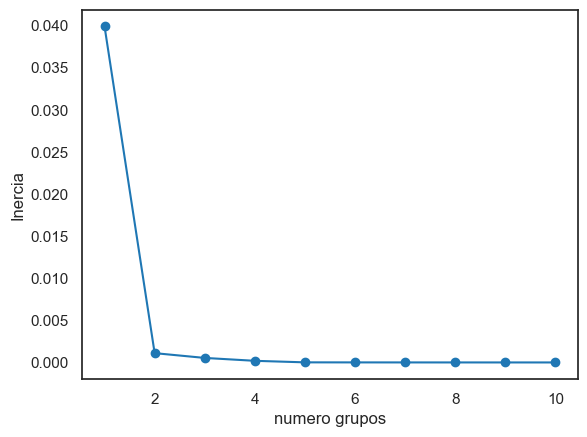

In [484]:
y=np.linspace(1,10)
plt.scatter(numCluster,inertia)
plt.plot(numCluster,inertia)
plt.xlabel('numero grupos')
plt.ylabel('Inercia')

In [489]:
kmd=KMeans(n_clusters=2)
kmd.fit(XN)

KMeans(n_clusters=2)

In [487]:
labels=kmd.labels_

In [495]:
etiquetas=set(labels)
neti=len(etiquetas)
XNLA= np.column_stack((XN, labels))
nombreCol= ['K','p','c','a','d','q','u','label']
ParaL=pd.DataFrame(XNLA, columns=nombreCol)

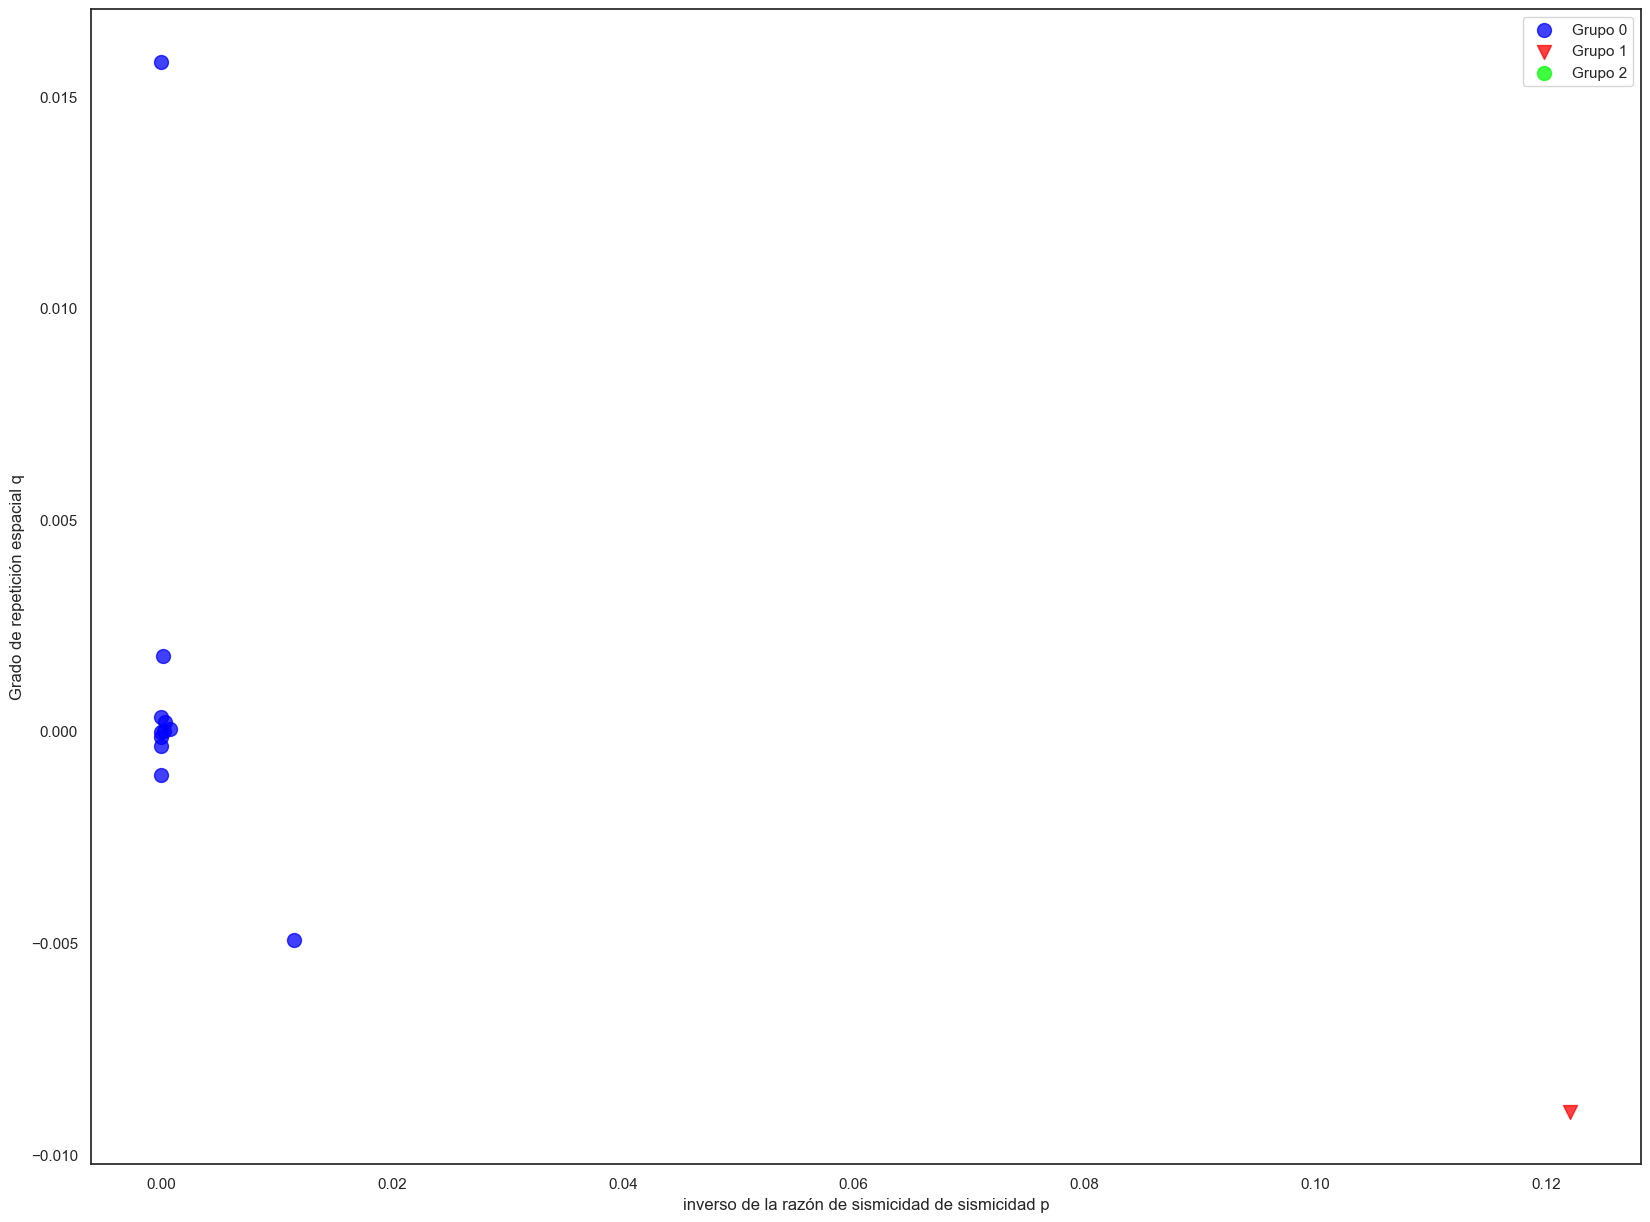

In [510]:
cmap=plt.cm.get_cmap('brg',neti)
# formato de la figura
plt.rcParams['figure.figsize'] = (20,15)
for l in etiquetas:
            plt.scatter(
                #df['Time'][kmd.labels_==l],
                #df['Magnitude'][kmd.labels_==l],
                ParaL['p'][kmd.labels_==l],
                ParaL['q'][kmd.labels_==l],
                # los colores se eligen por iteracion del mapa de calor como el valor -1 no se toma en cmap se 
                # clasifica directamente como negro
                c=[cmap(l)],
                marker='ov'[l%2],
                alpha=0.75,
                s=100,
                # se imprimen los clusters y -1 se clasifica diretametne como ruido
                label=f'Grupo {l}')
plt.xlabel('inverso de la razón de sismicidad de sismicidad p')
plt.ylabel('Grado de repetición espacial q')
plt.legend(bbox_to_anchor=[1, 1])
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']